# Speedhome Rental Analysis

The data gathered is from the [SpeedHome-Scraping](https://github.com/ahmadhafifihamdan/learning-projects/blob/master/speedhomerental/SpeedHome-Scraping.ipynb) as of 23/07/2019.

## Modules for analysis

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/speedhome2.csv")

In [3]:
df.head()

,name,price,sqft,high_rise,furnished,bath,bed,parking
0,"Regalia @ Jalan Sultan Ismail, Kuala Lumpur","RM 2,800",864 sqft,High-Rise,Fully furnished,2 bath,2 bed,1 parking
1,"Puncak Prima Condo, Sri Hartamas, Kuala Lumpur","RM 2,300",1095 sqft,High-Rise,Fully furnished,2 bath,3 bed,2 parking
2,The Forum Kuala Lumpur,"RM 2,800",1206 sqft,High-Rise,Fully furnished,2 bath,2 bed,1 parking
3,"Regalia @ Jalan Sultan Ismail, Kuala Lumpur","RM 2,800",864 sqft,High-Rise,Fully furnished,2 bath,2 bed,1 parking
4,Blok C4 Seksyen 10 Wangsa Maju Kuala Lumpur,RM 850,500 sqft,High-Rise,Unfurnished,2 bath,2 bed,1 parking


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 8 columns):
name         435 non-null object
price        435 non-null object
sqft         435 non-null object
high_rise    435 non-null object
furnished    435 non-null object
bath         435 non-null object
bed          435 non-null object
parking      435 non-null object
dtypes: object(8)
memory usage: 27.3+ KB


The current dataframe store `price`, `sqft`, `bath`, `bed`, and `parking` as object type. Let's change these to integer type.

In [5]:
df["bath"] = pd.to_numeric([i[0] for i in df["bath"]])
df["bed"] = pd.to_numeric([i[0] for i in df["bed"]])
df["parking"] = pd.to_numeric([i[0] for i in df["parking"]])
df["sqft"] = pd.to_numeric([i[:-5] for i in df["sqft"]])
df["price"] = [i.replace("RM ", "") for i in df["price"]]
df["price"] = pd.to_numeric([i.replace(",", "") for i in df["price"]])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 8 columns):
name         435 non-null object
price        435 non-null int64
sqft         435 non-null int64
high_rise    435 non-null object
furnished    435 non-null object
bath         435 non-null int64
bed          435 non-null int64
parking      435 non-null int64
dtypes: int64(5), object(3)
memory usage: 27.3+ KB


In [7]:
df.head()

,name,price,sqft,high_rise,furnished,bath,bed,parking
0,"Regalia @ Jalan Sultan Ismail, Kuala Lumpur",2800,864,High-Rise,Fully furnished,2,2,1
1,"Puncak Prima Condo, Sri Hartamas, Kuala Lumpur",2300,1095,High-Rise,Fully furnished,2,3,2
2,The Forum Kuala Lumpur,2800,1206,High-Rise,Fully furnished,2,2,1
3,"Regalia @ Jalan Sultan Ismail, Kuala Lumpur",2800,864,High-Rise,Fully furnished,2,2,1
4,Blok C4 Seksyen 10 Wangsa Maju Kuala Lumpur,850,500,High-Rise,Unfurnished,2,2,1


In [8]:
df.describe()

,price,sqft,bath,bed,parking
count,435.000000,435.000000,435.000000,435.000000,435.000000
mean,7234.291954,1088.645977,2.082759,2.441379,1.094253
std,56075.612506,814.344241,0.909525,1.037605,0.732925
min,250.000000,0.000000,0.000000,0.000000,0.000000
25%,1500.000000,757.500000,1.000000,2.000000,1.000000
50%,2000.000000,988.000000,2.000000,3.000000,1.000000
75%,2625.000000,1206.000000,3.000000,3.000000,2.000000
max,900000.000000,12435.000000,6.000000,6.000000,4.000000


In [9]:
# Check proportion of highrise unit and landed unit in dataset.
round(df["high_rise"].value_counts(normalize=True)*100,2)

High-Rise    92.41
Landed        7.59
Name: high_rise, dtype: float64

In [10]:
# Check proportion of furnished unit in dataset.
round(df["furnished"].value_counts(normalize=True)*100,2)

Fully furnished        54.02
Partially furnished    35.17
Unfurnished            10.80
Name: furnished, dtype: float64

In [11]:
# Check proportion of no of bathroom in dataset.
round(df["bath"].value_counts(normalize=True)*100,2)

2    45.98
1    25.52
3    20.46
4     6.44
0     0.92
5     0.46
6     0.23
Name: bath, dtype: float64

In [12]:
# Check proportion of no of bedroom in dataset.
round(df["bed"].value_counts(normalize=True)*100,2)

3    44.83
1    23.22
2    19.08
4    10.57
0     1.15
5     0.92
6     0.23
Name: bed, dtype: float64

In [13]:
# Check proportion of no of parking in dataset.
round(df["parking"].value_counts(normalize=True)*100,2)

1    52.41
2    26.44
0    20.00
4     0.69
3     0.46
Name: parking, dtype: float64

Most of the units are in high-rise buildings. Half of the units have 3 `bed`, 2 `bath`, and 1 `parking`. The common 3 Bed 2 Bathroom unit is align with how I'd think about housing units today.

Let's look at the correlation between our features and price of the rental unit. Before that, let's encode our categorical features; `high_rise` and `furnished`.

In [14]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
encoded_df = df.copy()
enc.fit(df["high_rise"])
encoded_df["high_rise"] = enc.transform(df["high_rise"])
enc.fit(df["furnished"])
encoded_df["furnished"] = enc.transform(df["furnished"])
encoded_df.head()

,name,price,sqft,high_rise,furnished,bath,bed,parking
0,"Regalia @ Jalan Sultan Ismail, Kuala Lumpur",2800,864,0,0,2,2,1
1,"Puncak Prima Condo, Sri Hartamas, Kuala Lumpur",2300,1095,0,0,2,3,2
2,The Forum Kuala Lumpur,2800,1206,0,0,2,2,1
3,"Regalia @ Jalan Sultan Ismail, Kuala Lumpur",2800,864,0,0,2,2,1
4,Blok C4 Seksyen 10 Wangsa Maju Kuala Lumpur,850,500,0,2,2,2,1


In [15]:
encoded_df.corr()["price"].sort_values(ascending=False)

price        1.000000
bed          0.052552
parking      0.023729
sqft         0.000687
bath        -0.001345
high_rise   -0.026071
furnished   -0.061605
Name: price, dtype: float64

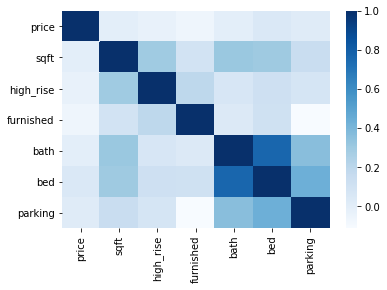

In [16]:
sns.heatmap(encoded_df.corr(), cmap = "Blues")

It looks like there's no significant correlation between the features and the price of the rental unit. Maybe we should look into locations of the units but that require further data scrapping from the site. Let's keep using the current data we have and do further analysis with location next time. 

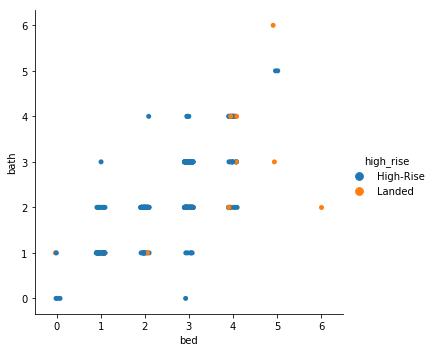

In [17]:
sns.catplot(x="bed", y="bath", data=df, hue="high_rise")

There are units with 0 bedroom and 0 bathroom. 

In [18]:
len(df.loc[(df["bath"]==0) & (df["bed"]==0)])

3

In [19]:
df.loc[(df["bath"]==0) & (df["bed"]==0)]

,name,price,sqft,high_rise,furnished,bath,bed,parking
279,"Suite Vivo , 9 Seputeh",1600,480,High-Rise,Partially furnished,0,0,0
296,28 Boulevard,1400,450,High-Rise,Partially furnished,0,0,1
342,Regalia Suites,2000,500,High-Rise,Fully furnished,0,0,0


These are the units with 0 bedroom and bathroom. Will look into it manually in the website to see why. Could be mistakes by owner when registering their units on the website.

Let's look at the top 10 most expensive and cheapest rental unit.

In [25]:
df.sort_values(by="price", ascending=False).head(10)

,name,price,sqft,high_rise,furnished,bath,bed,parking
147,sentrio pandan Facing KLCC,900000,950,High-Rise,Fully furnished,2,3,2
217,"Menara Pelangi, Brickfields",510000,967,High-Rise,Fully furnished,2,3,1
180,"Pelangi Condominium, Sentul",430000,1223,High-Rise,Fully furnished,2,3,1
228,ascadia,360000,930,High-Rise,Partially furnished,2,3,0
231,"The Valley TTDI, Ampang",14900,5850,Landed,Fully furnished,4,4,0
20,"Gallery U-Thant, Ampang Hilir",9000,4074,High-Rise,Partially furnished,4,3,2
72,"The Park Residences, Bangsar South",6900,2068,High-Rise,Fully furnished,4,4,2
227,hijauan kiara,6800,2090,High-Rise,Fully furnished,2,3,2
148,"m city, jalan ampang",6250,1920,High-Rise,Fully furnished,3,3,1
223,exsim | expressionz professional suites @ tun ...,6100,921,High-Rise,Fully furnished,2,2,1


In [26]:
df.sort_values(by="price", ascending=False).tail(10)

,name,price,sqft,high_rise,furnished,bath,bed,parking
164,"Sang Suria, Sentul",400,1200,High-Rise,Fully furnished,1,1,0
384,jalan ayer panas baharu,350,1000,Landed,Partially furnished,4,4,2
236,"de tropicana, kuchai lama",350,1102,High-Rise,Partially furnished,2,1,0
298,FLAT PANDAN JAYA,350,0,High-Rise,Partially furnished,1,0,1
276,"Seasons Garden Residences, Wangsa Maju",350,950,High-Rise,Partially furnished,2,3,0
269,Landed room bilik near LRT and AEON 016-9743361,330,1800,Landed,Partially furnished,3,3,0
310,"University Tower, Petaling Jaya",327,1200,High-Rise,Partially furnished,1,1,0
128,"Amadesa, Desa Petaling",310,750,High-Rise,Partially furnished,2,2,1
198,ROOM FOR RENT (TERRACE HOUSE),275,250,Landed,Partially furnished,3,5,4
335,sri penara,250,600,High-Rise,Partially furnished,4,4,0


Looking at these shows us that some users are using the platform improperly. Among the cheapest unit, they are only renting a room but advertised as the whole house/apartment. Remember that from the [SpeedHome-Scraping](https://github.com/ahmadhafifihamdan/learning-projects/blob/master/speedhomerental/SpeedHome-Scraping.ipynb), I have already filtered out rooms' rental and only look at the whole unit.

The top 4 most expensive unit seems like improperly priced or wrongly advertised as rental and actually is for sale. For example: [ascadia](https://speedhome.com/ads/ascadia-IJMCWJEQ)

On top of that, Speedhome website actually doesn't return the result that you wanted by looking at some of the names above which causing trouble in manually checking some of the listing. This also means that potential tenants missed out on rental units because they couldn't find the name of apartment or area that are searching.

## Conclusion
Speedhome might need to do some spring cleaning in their database and consider changing the form that potential landlords are posting their units or provide samples for the users to use as guidance when posting their units.

This marks the end for the simple analysis from the data scraped from Speedhome. As mentioned above, in the future, I will try to crawl further and fetch the location and other features of the units aside from what I've gathered now.

Thank you for reading!